In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.6/825.6 kB 12.8 MB/s eta 0:00:00a 0:00:01


In [ ]:
import os
import cv2
import yaml
import shutil
import numpy as np
import matplotlib.pyplot as plt

import torch
print(torch.cuda.is_available())

from ultralytics import YOLO

True



## Changer notre repertoire afin qu'il soit de la forme suivante
*dataset/ <br>
&emsp;&emsp;train/<br>
&emsp;&emsp;&emsp;&emsp;labels/<br>
&emsp;&emsp;&emsp;&emsp;images/<br>
&emsp;&emsp;val/<br>
&emsp;&emsp;&emsp;&emsp;labels/<br>
&emsp;&emsp;&emsp;&emsp;images/<br>
&emsp;&emsp;test/<br>
&emsp;&emsp;&emsp;&emsp;labels/<br>
&emsp;&emsp;&emsp;&emsp;images/<br>*



In [ ]:
training_config = {"path": r"C:\Users\DELL\Downloads\ANPR.v2i.yolov8", "train":"train/images", "val": "validation/images", "test": "test/images", "names": {0: "license_plate"}}
with open('data.yaml', 'w') as yaml_file:
    yaml.dump(training_config, yaml_file, sort_keys=False)

## Affichage de quelques images avec leurs etiquettes

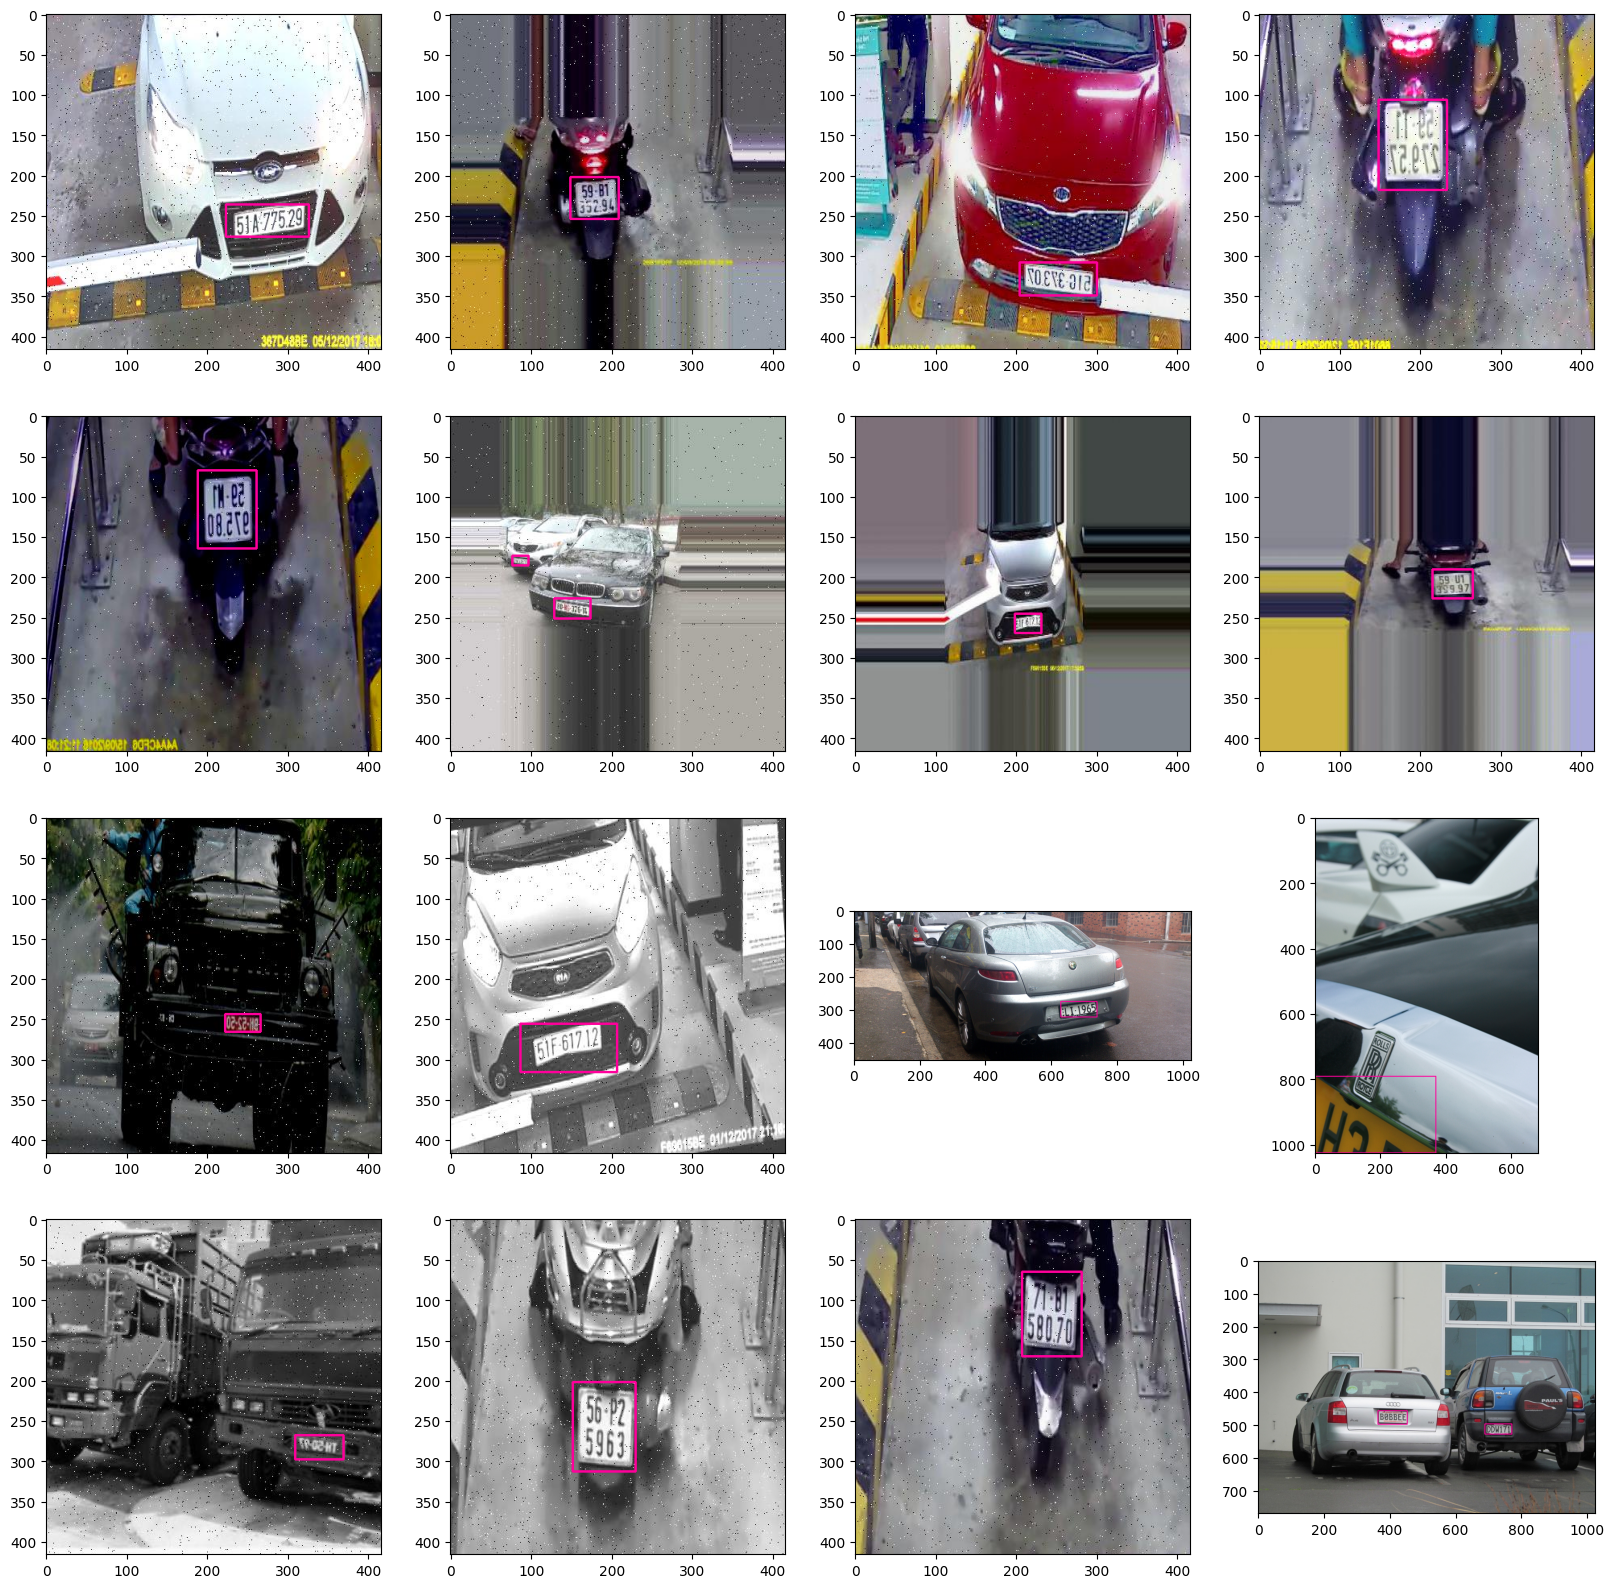

In [ ]:
IMG_DATA = r"C:\Users\DELL\Downloads\ANPR.v2i.yolov8\train\images"
LABELA_DATA = r"C:\Users\DELL\Downloads\ANPR.v2i.yolov8\train\labels"

def preprocess_bbox(bbox_data, img_height, img_width):

    bbox_data = bbox_data.strip('\n')
    # class, bbox center x, bbox center y, h, w
    _, x, y, w, h = map(float, bbox_data.split(" "))
    x1 = int((x - w / 2) * img_width)
    x2 = int((x + w / 2) * img_width)
    y1 = int((y - h / 2) * img_height)
    y2 = int((y + h / 2) * img_height)

    return [x1, y1, x2, y2]


def plot_labeled_data(mode='train'):

    fig = plt.figure(figsize=(20, 20))
    rows = 4
    columns = 4

    imgs_list = os.listdir(IMG_DATA.format(mode))
    labels_list = os.listdir(LABELA_DATA.format(mode))

    for i, img_name in enumerate(imgs_list[:16]):

        img = cv2.imread(os.path.join(IMG_DATA.format(mode), img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_h, img_w, _ = img.shape

        fl = open(os.path.join(LABELA_DATA.format(mode), img_name[:-3] + 'txt'), 'r')
        data = fl.readlines()
        for d in data:
            bbox = preprocess_bbox(d, img_h, img_w)
            cv2.rectangle(img=img, pt1=(bbox[0], bbox[1]), pt2=(bbox[2], bbox[3]), color=(255, 0, 155), thickness=2)
        fl.close()
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
    plt.show()

plot_labeled_data()

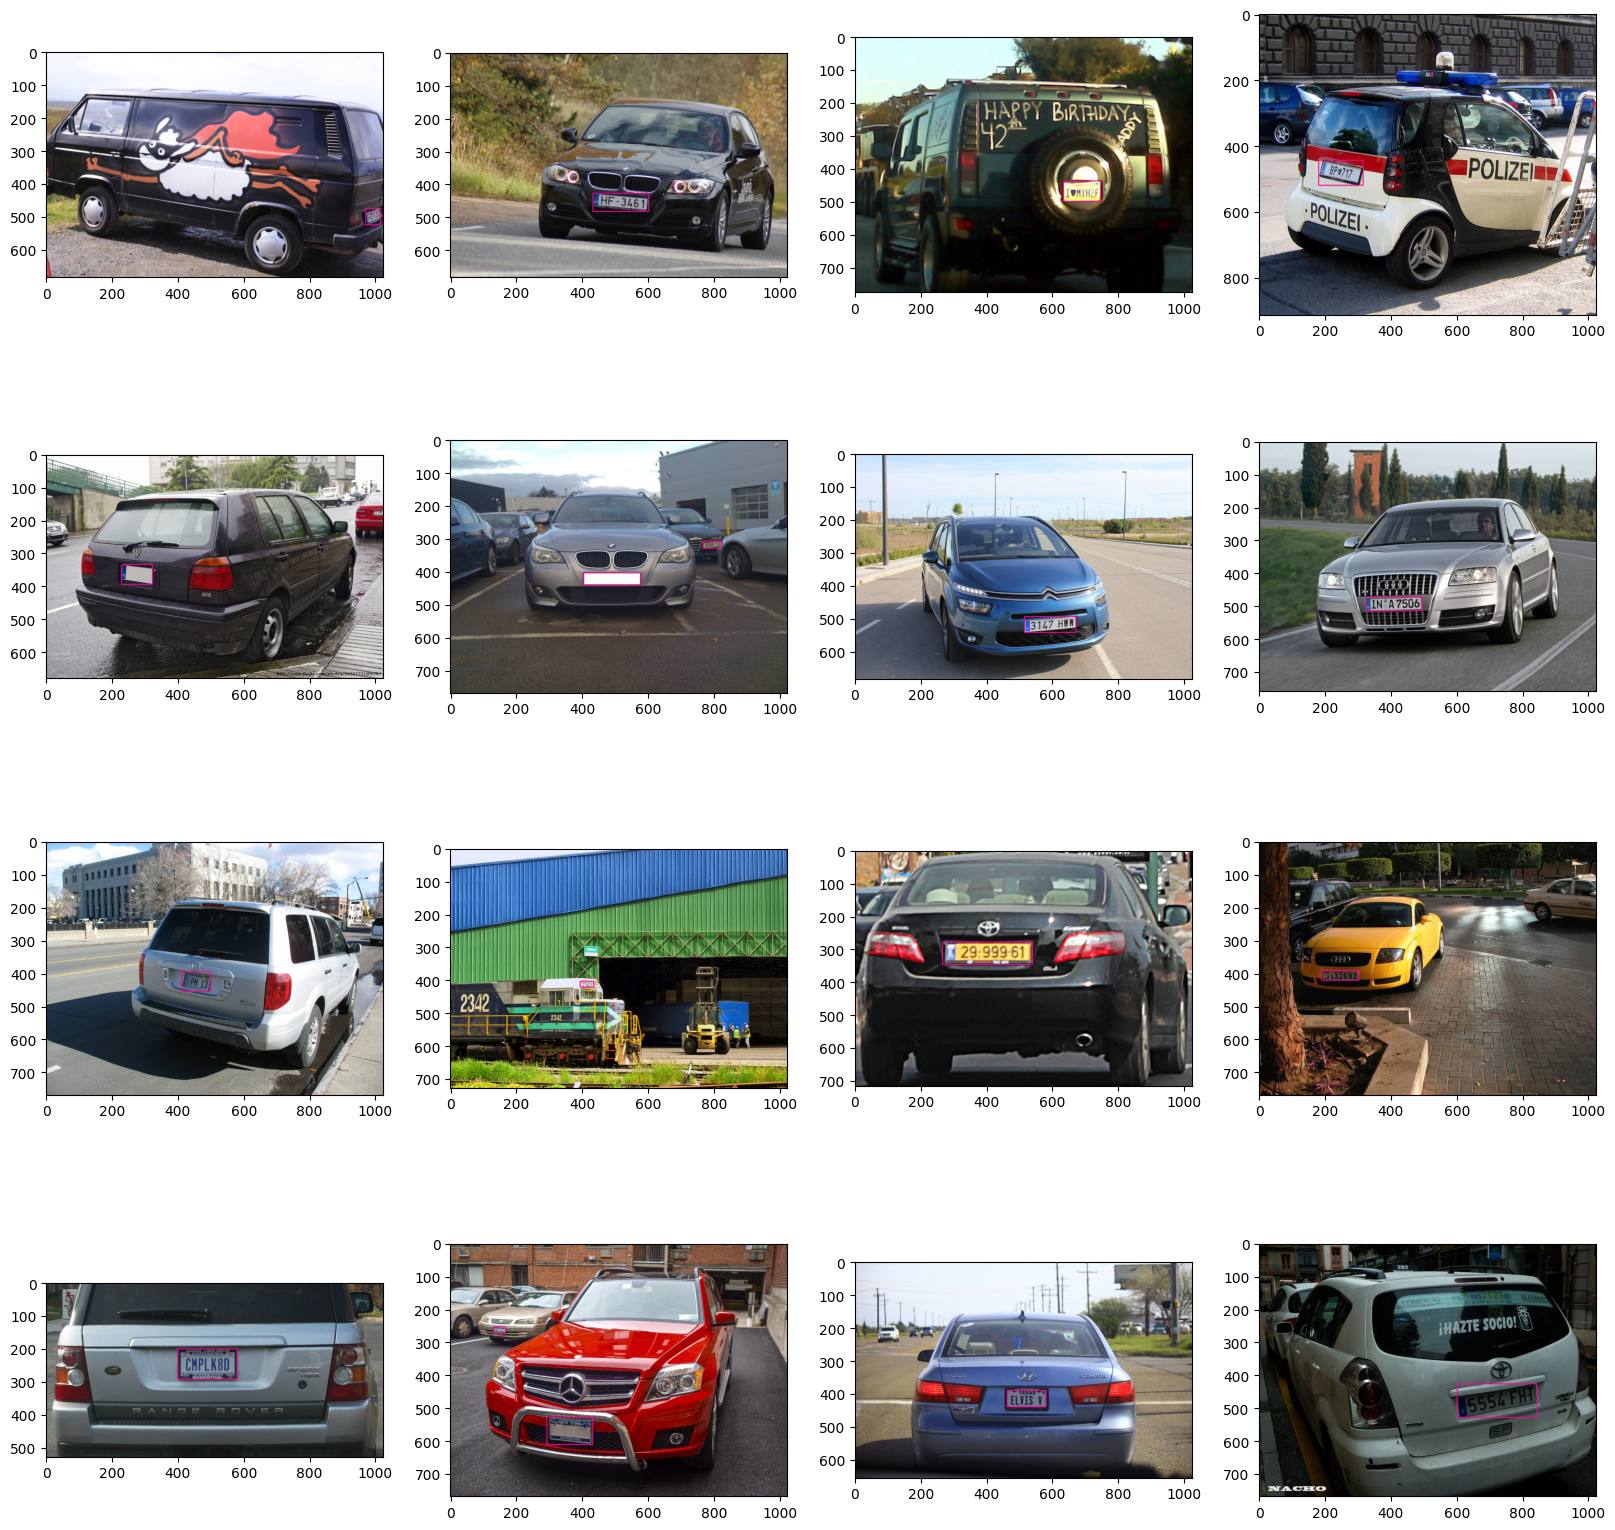

In [ ]:
plot_labeled_data(mode='test')

# Entrainnement du model

## Choix d'architecture
Pour l'entraînement, nous avons utilisé le modèle YOLOv8 dans sa version légère pré-entraînée, yolov8n.pt (Nano), en raison de sa rapidité et de sa faible consommation de ressources  

In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.9MB/s]


In [ ]:
results = model.train(data="data.yaml", epochs=50, imgsz=640)

Ultralytics YOLOv8.2.67 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]
2024-07-28 10:43:08,303	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-28 10:43:09,989	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train/labels... 25470 images, 18 backgrounds, 0 corrupt: 100%|██████████| 25470/25470 [00:19<00:00, 1314.29it/s]


train: New cache created: /kaggle/working/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/dataset/validation/labels... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:00<00:00, 1099.82it/s]


val: New cache created: /kaggle/working/dataset/validation/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.36G      1.258      1.461      1.147         27        640: 100%|██████████| 1592/1592 [04:58<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.36it/s]


                   all       1073       1573      0.773      0.647      0.684      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.31G      1.251     0.7806       1.14         31        640: 100%|██████████| 1592/1592 [04:48<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.24it/s]

                   all       1073       1573      0.735      0.593      0.641      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.31G      1.282     0.7658      1.174         23        640: 100%|██████████| 1592/1592 [04:45<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.45it/s]

                   all       1073       1573      0.723      0.523      0.575       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.31G      1.275     0.7446      1.182         18        640: 100%|██████████| 1592/1592 [04:44<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.52it/s]

                   all       1073       1573      0.773      0.598      0.658      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.31G      1.249       0.69      1.172         32        640: 100%|██████████| 1592/1592 [04:44<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.54it/s]

                   all       1073       1573      0.806      0.638      0.691      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.31G      1.234     0.6615      1.168         22        640: 100%|██████████| 1592/1592 [04:44<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.50it/s]

                   all       1073       1573      0.805      0.655      0.715      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.31G      1.207     0.6327      1.152         41        640: 100%|██████████| 1592/1592 [04:44<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.53it/s]

                   all       1073       1573      0.796      0.687       0.72      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.31G      1.192     0.6174      1.138         26        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.33it/s]

                   all       1073       1573      0.811      0.711      0.754      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.31G       1.19     0.6062      1.141         30        640: 100%|██████████| 1592/1592 [04:44<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.52it/s]

                   all       1073       1573      0.839      0.695       0.77      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.31G      1.176     0.5924       1.13         23        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.48it/s]

                   all       1073       1573      0.829      0.706      0.766      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.31G      1.172     0.5833      1.129         30        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.44it/s]

                   all       1073       1573      0.829      0.729       0.79      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.31G      1.165     0.5721      1.125         27        640: 100%|██████████| 1592/1592 [04:44<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.48it/s]

                   all       1073       1573      0.833      0.745      0.793      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.31G      1.149     0.5614      1.115         24        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.49it/s]

                   all       1073       1573      0.826       0.74      0.787      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.31G      1.145     0.5552      1.112         23        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.47it/s]

                   all       1073       1573      0.825      0.775      0.805      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.31G      1.143     0.5497      1.115         26        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.24it/s]

                   all       1073       1573      0.818      0.763      0.803      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.31G      1.135      0.541      1.107         23        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]

                   all       1073       1573      0.838       0.75      0.805      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.31G      1.135     0.5384      1.107         29        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.54it/s]

                   all       1073       1573      0.843      0.772      0.814      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.31G      1.127     0.5345      1.102         23        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.58it/s]

                   all       1073       1573       0.84       0.78      0.814      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.31G      1.128     0.5334      1.104         22        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.63it/s]

                   all       1073       1573      0.833      0.785      0.819      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.31G      1.119     0.5252      1.102         27        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.67it/s]

                   all       1073       1573      0.839      0.781      0.823      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.31G      1.117     0.5226      1.098         23        640: 100%|██████████| 1592/1592 [04:43<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.66it/s]

                   all       1073       1573      0.837      0.779      0.821      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.31G       1.11     0.5157      1.095         24        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.30it/s]

                   all       1073       1573       0.84      0.783      0.826      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.31G       1.11     0.5126      1.094         35        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.34it/s]

                   all       1073       1573      0.827      0.791      0.827      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.31G      1.103     0.5084       1.09         26        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.59it/s]

                   all       1073       1573      0.837      0.804      0.832      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.31G      1.102     0.5032      1.089         23        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.62it/s]

                   all       1073       1573      0.844      0.796      0.833      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.31G      1.094     0.4999      1.085         24        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]

                   all       1073       1573      0.845      0.793      0.834      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.31G      1.096     0.4966      1.085         18        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.69it/s]

                   all       1073       1573      0.848      0.792      0.834      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.31G      1.086     0.4914      1.081         20        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.63it/s]

                   all       1073       1573      0.831      0.807      0.838      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.31G      1.088      0.488      1.084         20        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.63it/s]

                   all       1073       1573      0.836      0.807      0.835      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.31G      1.078     0.4818      1.077         23        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]

                   all       1073       1573      0.841      0.804      0.841      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.31G      1.079     0.4827      1.081         27        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.61it/s]

                   all       1073       1573      0.831      0.803      0.838      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.31G      1.074     0.4774      1.077         31        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]

                   all       1073       1573      0.834      0.804      0.838      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.31G      1.068     0.4726      1.074         25        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.73it/s]

                   all       1073       1573      0.847      0.796      0.839      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.31G      1.067     0.4701      1.073         21        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]

                   all       1073       1573      0.855        0.8      0.843      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.31G      1.059      0.468      1.068         20        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.67it/s]

                   all       1073       1573      0.849      0.801      0.842      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.31G      1.054     0.4621      1.067         22        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]

                   all       1073       1573      0.846      0.805      0.843      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.31G      1.059      0.462      1.071         22        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.37it/s]

                   all       1073       1573      0.843      0.808      0.843      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.31G       1.05     0.4556      1.067         21        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.30it/s]

                   all       1073       1573      0.843      0.807      0.842      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.31G       1.04     0.4486      1.064         23        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.51it/s]

                   all       1073       1573      0.843      0.805      0.841      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.31G      1.034     0.4445       1.06         27        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.74it/s]

                   all       1073       1573      0.841      0.809      0.841      0.454


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.31G      1.025        0.4      1.081         17        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.59it/s]

                   all       1073       1573      0.842      0.808       0.84      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.31G      1.015     0.3926       1.08         16        640: 100%|██████████| 1592/1592 [04:38<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.65it/s]

                   all       1073       1573      0.845      0.812      0.841      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.31G      1.007     0.3913      1.075         15        640: 100%|██████████| 1592/1592 [04:39<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.69it/s]

                   all       1073       1573      0.843      0.809       0.84      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.31G          1     0.3843      1.072         16        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.56it/s]

                   all       1073       1573      0.841      0.813      0.841      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.31G     0.9936     0.3808      1.068         16        640: 100%|██████████| 1592/1592 [04:39<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.62it/s]

                   all       1073       1573      0.842      0.811      0.841      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.31G     0.9867     0.3761      1.065         14        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.58it/s]

                   all       1073       1573      0.847      0.809      0.841      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.31G      0.978     0.3714      1.061         14        640: 100%|██████████| 1592/1592 [04:41<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.63it/s]

                   all       1073       1573      0.847      0.809      0.841      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.31G     0.9758     0.3672      1.061         19        640: 100%|██████████| 1592/1592 [04:39<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.69it/s]

                   all       1073       1573       0.85      0.808      0.841      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.31G     0.9677     0.3633      1.057         15        640: 100%|██████████| 1592/1592 [04:40<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.58it/s]

                   all       1073       1573       0.85      0.807      0.841       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.31G     0.9638     0.3576      1.057         15        640: 100%|██████████| 1592/1592 [04:39<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.64it/s]

                   all       1073       1573      0.849      0.807      0.839       0.46



50 epochs completed in 4.025 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.67 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]


                   all       1073       1573      0.848      0.808      0.841      0.461
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


# Evaluation du Model

In [ ]:
metrics = model.val(data='data.yaml', split='test')

Ultralytics YOLOv8.2.67 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/dataset/test/labels... 386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 386/386 [00:00<00:00, 1328.01it/s]


val: New cache created: /kaggle/working/dataset/test/labels.cache


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.33it/s]


                   all        386        512      0.945      0.848      0.921      0.721
Speed: 0.1ms preprocess, 5.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
metrics.box.map,

(0.7214126348897928,)